# 48 ~ 49강.서울시 일별 추가확진자 동향

In [28]:
import pandas as pd

df = pd.read_csv('C:/code/data/서울시 코로나19 확진자 현황.csv', encoding = 'utf-8')

C:\Users\sarah\AppData\Local\Temp\ipykernel_9100\4110167673.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/code/data/서울시 코로나19 확진자 현황.csv', encoding = 'utf-8')


In [29]:
# 결측치 및 데이터 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      99550 non-null  int64  
 1   확진일     99550 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      99550 non-null  object 
 6   여행력     1717 non-null   object 
 7   접촉력     99550 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      99550 non-null  object 
 10  이동경로    10000 non-null  object 
 11  등록일     99550 non-null  object 
 12  수정일     99550 non-null  object 
 13  노출여부    99550 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 10.6+ MB


In [30]:
df.drop(['환자번호', '국적', '환자정보', '이동경로','조치사항','등록일', '수정일', '노출여부'], axis = 1, inplace = True)

In [31]:
df.지역.unique()
# print(len(df.지역.unique())) # 29
# 타시도에 공백 존재

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [32]:
df.지역 = df.지역.str.rstrip().str.lstrip()
# len(df.지역.str.rstrip().str.lstrip().unique()) # 27

In [33]:
df.head()

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-


In [34]:
df.확진일 = pd.to_datetime(df.확진일)

In [40]:
df_gu = df.pivot_table(index = '확진일', columns = '지역', values = '연번', aggfunc = 'count', margins = True)

df_gu = df_gu.fillna(0)

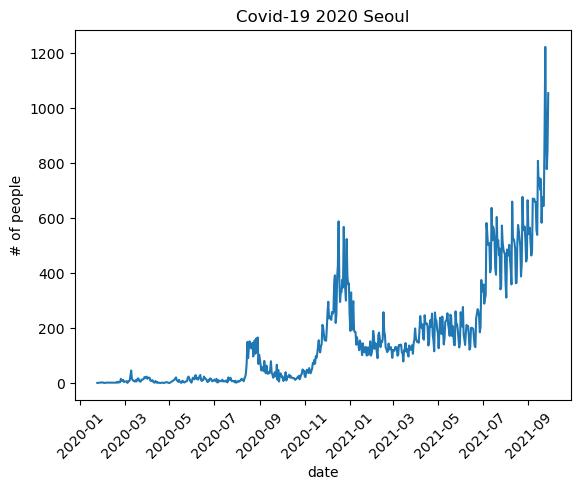

In [68]:
import matplotlib.pyplot as plt

x = df_gu.index[ : -1]
y = df_gu['All'][ : -1]

plt.plot(x, y)
plt.title('Covid-19 2020 Seoul')
plt.xlabel('date')
plt.ylabel('# of people')
plt.xticks(rotation = 45)
plt.show()

In [83]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

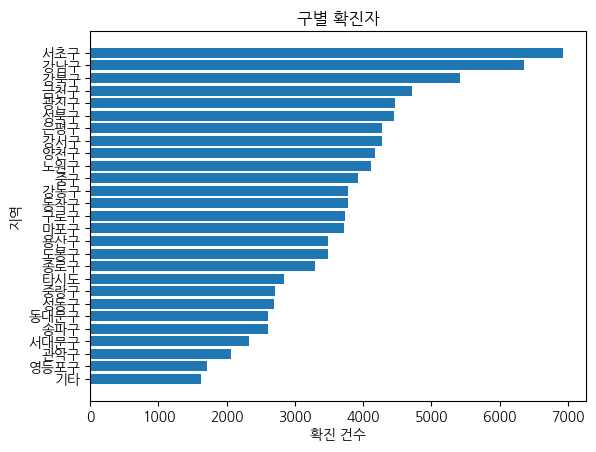

In [92]:
x = list(df.지역.unique())
y = sorted(df_gu.loc['All'][:-1])

plt.barh(x, y)
plt.title('구별 확진자')
plt.xlabel('확진 건수')
plt.ylabel('지역')
plt.show()

In [95]:
df.접촉력.value_counts()[:10]

기타 확진자 접촉               37943
감염경로 조사중                31964
타시도 확진자 접촉               4244
해외유입                     1729
동부구치소 관련                 1175
병원 및 요양시설                 988
송파구 소재 시장 관련(?21.9.)      659
성북구 사랑제일교회 관련             641
중구 소재 시장 관련(?21.9.)       277
강서구 교회 관련                 246
Name: 접촉력, dtype: int64

<AxesSubplot:>

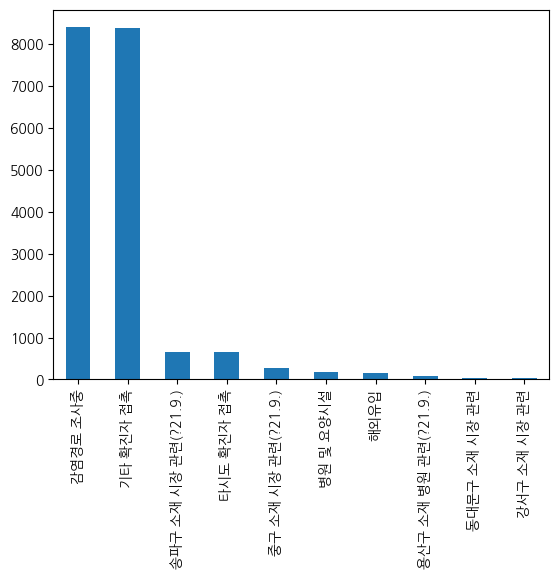

In [102]:
df.loc[df.확진일.dt.month == 9, '접촉력'].value_counts()[:10].plot.bar()

# 50 ~ 53강. 따릉이 이용 데이터

In [2]:
import pandas as pd

df1 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.01.csv', encoding = 'cp949')
df2 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.02.csv', encoding = 'cp949')
df3 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.03.csv', encoding = 'cp949')
df4 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.04.csv', encoding = 'cp949')
df5 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.05.csv', encoding = 'cp949')
df6 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.06.csv', encoding = 'cp949')

C:\Users\sarah\AppData\Local\Temp\ipykernel_7060\2345155109.py:4: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.02.csv', encoding = 'cp949')
C:\Users\sarah\AppData\Local\Temp\ipykernel_7060\2345155109.py:5: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.03.csv', encoding = 'cp949')
C:\Users\sarah\AppData\Local\Temp\ipykernel_7060\2345155109.py:6: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.04.csv', encoding = 'cp949')
C:\Users\sarah\AppData\Local\Temp\ipykernel_7060\2345155109.py:7: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('C:/code/data/공공자전거 대여이력 정보_2021.05.csv', encoding = 'cp949')


In [3]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis = 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


In [8]:
df.isnull().sum()
df.dropna(axis = 0, inplace= True)

In [9]:
df.loc[df['반납일시'].str[ : 10].str.contains('-') == False, '반납대여소명'] =  df.loc[df['반납일시'].str[ : 10].str.contains('-') == False, '반납대여소번호']
df.loc[df['반납일시'].str[ : 10].str.contains('-') == False, '반납대여소번호'] =  df.loc[df['반납일시'].str[ : 10].str.contains('-') == False, '반납일시']
df.loc[df['반납일시'].str[ : 10].str.contains('-') == False, '반납일시'] =  df.loc[df['반납일시'].str[ : 10].str.contains('-') == False, '대여거치대']
df.loc[df['반납일시'].str[ : 10].str.contains('-') == False, '대여거치대'] =  0

In [11]:
df['대여일시']

0          2021-01-02 20:50:36
1          2021-01-04 16:02:12
2          2021-01-13 21:02:05
3          2021-01-14 21:02:55
4          2021-01-18 18:02:08
                  ...         
3445939    2021-06-30 22:44:14
3445940    2021-06-30 22:45:19
3445941    2021-06-30 22:43:43
3445942    2021-06-30 22:11:14
3445943    2021-06-30 22:12:10
Name: 대여일시, Length: 13613604, dtype: object

In [12]:
df['대여일자'] = df['대여일시'].str[ : 10]
df['반납일자'] = df['반납일시'].str[ : 10]

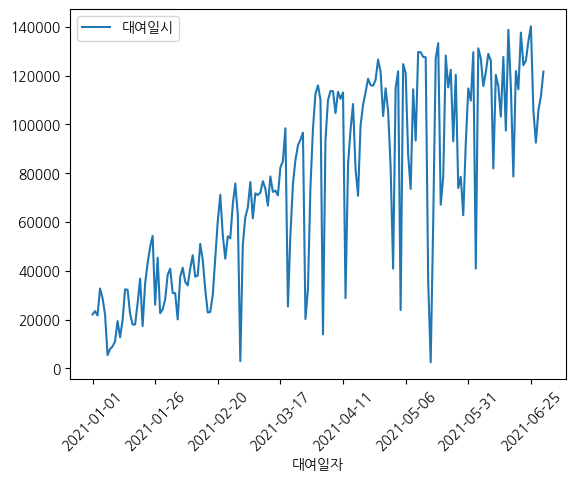

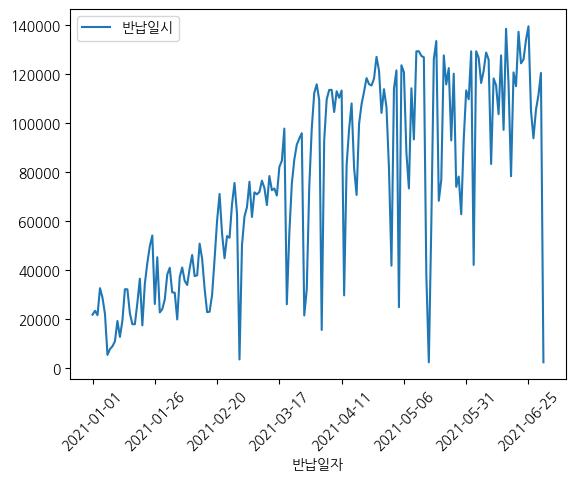

In [13]:
df.pivot_table(index = '대여일자', values = '대여일시', aggfunc = 'count').plot.line()
plt.xticks(rotation = 45)
df.pivot_table(index = '반납일자', values = '반납일시', aggfunc = 'count').plot.line()
plt.xticks(rotation = 45)
plt.show()

In [14]:
df['대여시간'] = df['대여일시'].str[11 : 13]
df['반납시간'] = df['반납일시'].str[11 : 13]

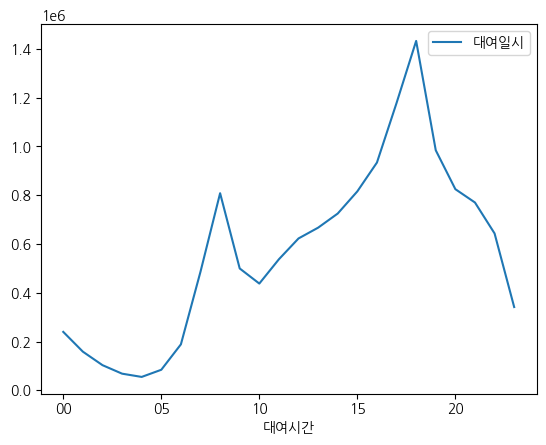

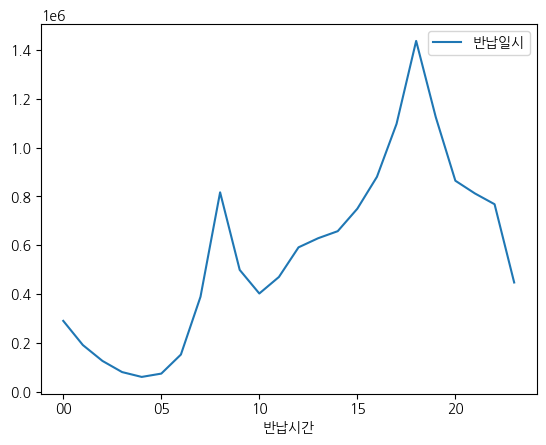

In [15]:
df.pivot_table(index = '대여시간', values = '대여일시', aggfunc = 'count').plot.line()
df.pivot_table(index = '반납시간', values = '반납일시', aggfunc = 'count').plot.line()
plt.show()

In [16]:
df['반납대여소번호'] = df['반납대여소번호'].astype('int')

len(df['반납대여소번호'].unique())

2493

In [17]:
df.drop(['자전거번호', '대여거치대', '반납거치대'], axis = 1, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613604 entries, 0 to 3445943
Data columns (total 12 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   int32  
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
 8   대여일자      object 
 9   반납일자      object 
 10  대여시간      object 
 11  반납시간      object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 1.3+ GB


In [19]:
for col in ['대여 대여소번호', '대여 대여소명', '반납대여소번호', '반납대여소명'] : 
    df[col] = df[col].astype('category')

In [20]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여일자,반납일자,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,2021-01-18,18,18


In [21]:
del df1
del df2
del df3
del df4
del df5
del df6

# 54 ~ 55강. 서울시 생필품, 농수축산물 가격 데이터

In [19]:
import pandas as pd
df = pd.read_csv('C:/code/data/생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding = 'cp949')

In [20]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [21]:
df.drop(['일련번호', '자치구 코드', '점검일자'], axis = 1, inplace = True)

In [22]:
meat = df[df['품목 이름'].str.contains('삼겹살')]

In [23]:
meat['실판매규격'].unique()

array(['600g (100g 4,280원)', '100g ', '600g', '100g', '600g(1등급)',
       '(100g)', '1등급(600g)', '1근', '600g(생목살 1+)', '600g (3,380원)',
       '600g (100g 3,480원)', '600g (100g 2,680원)', '600g (100g 3,380원)',
       '600g 1+', '600g (100g 3,181원)', '600g (100g 3,280원',
       '600g(100g 4,280원)', '600g (100g  3,180원)', '600g(100g 3,180원)',
       '600g (100g 3,080원)', '600g (100g 3080원)', '600g(100g 3,080원)',
       '600g 100g 3,080원)', '600g (100g 3,280원)', '600g (100g 2,880원)',
       '600g(100g 3,280원)', '600g (100g 2,980원)', '(600g)'], dtype=object)

In [24]:
meat.loc[meat['실판매규격'].apply(lambda x : True if x.find('600g') > -1 else False), '실판매규격'] = 600
meat.loc[meat['실판매규격'] == '1근', '실판매규격'] = 600
meat.loc[meat['실판매규격'] != 600, '실판매규격'] = 100

In [25]:
meat.loc[meat.실판매규격 == 600, '100g 가격'] = meat['가격(원)'] / 6
meat.loc[meat.실판매규격 == 100, '100g 가격'] = meat['가격(원)']

C:\Users\sarah\AppData\Local\Temp\ipykernel_14632\2984759607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat.loc[meat.실판매규격 == 600, '100g 가격'] = meat['가격(원)'] / 6


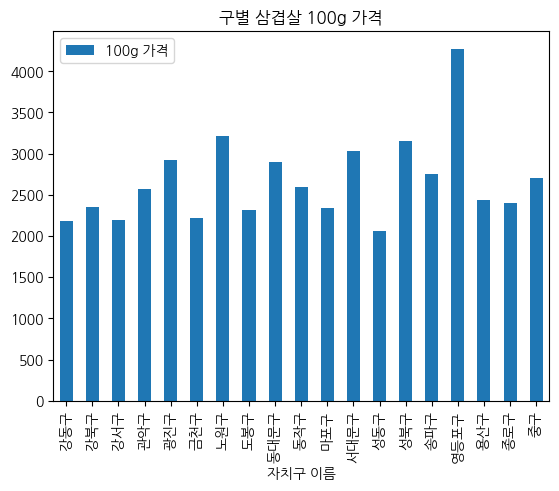

In [26]:
meat.pivot_table(index = '자치구 이름', values = '100g 가격', aggfunc = 'mean').plot.bar()
plt.title('구별 삼겹살 100g 가격')
plt.show()

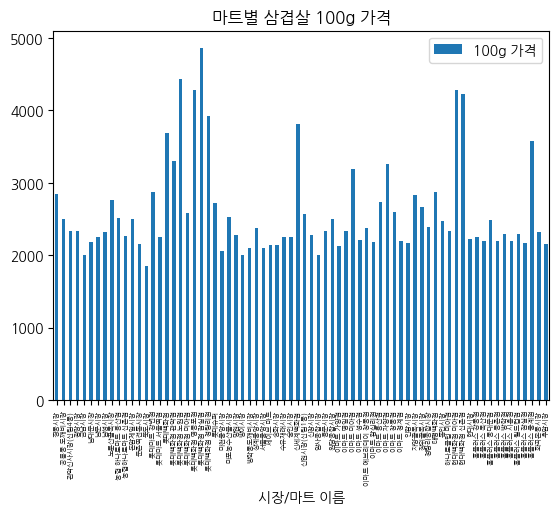

In [44]:
meat.pivot_table(index = '시장/마트 이름', values = '100g 가격', aggfunc = 'mean').plot.bar()
plt.xticks(fontsize = 5)
plt.title('마트별 삼겹살 100g 가격')
plt.show()

In [28]:
egg = df[df['품목 이름'].str.contains(r'달걀|계란|특란|대란')]

In [29]:
egg['품목 번호'].unique()

array([171, 320,  17, 321, 181, 134], dtype=int64)

In [30]:
# 10개 : 171, 134
# 15개 : 321, 181
# 25개 : 17
# 30개 : 320
# 

In [31]:
egg.loc[egg['품목 번호'] == 321, '10구 가격'] = egg.loc[egg['품목 번호'] == 321, '가격(원)'] / 1.5 
egg.loc[egg['품목 번호'] == 181, '10구 가격'] = egg.loc[egg['품목 번호'] == 181, '가격(원)'] / 1.5 
egg.loc[egg['품목 번호'] == 17, '10구 가격'] = egg.loc[egg['품목 번호'] == 17, '가격(원)'] / 2.5
egg.loc[egg['품목 번호'] == 320, '10구 가격'] = egg.loc[egg['품목 번호'] == 320, '가격(원)'] / 3

C:\Users\sarah\AppData\Local\Temp\ipykernel_14632\634014439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg.loc[egg['품목 번호'] == 321, '10구 가격'] = egg.loc[egg['품목 번호'] == 321, '가격(원)'] / 1.5


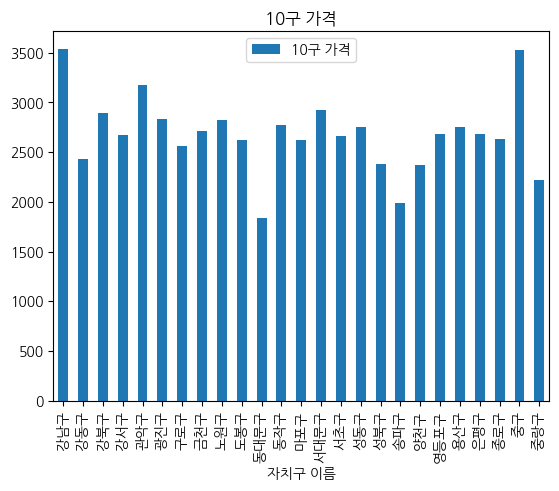

In [33]:
egg.pivot_table(index = '자치구 이름', values = '10구 가격', aggfunc = 'mean').plot.bar()
plt.title('10구 가격')
plt.show()

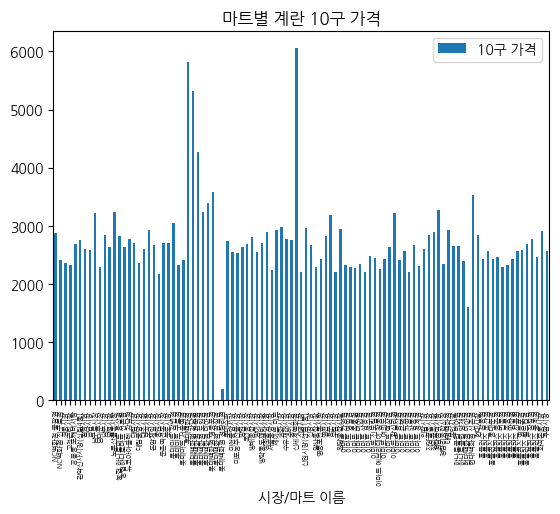

In [43]:
egg.pivot_table(index = '시장/마트 이름', values = '10구 가격', aggfunc = 'mean').plot.bar()
plt.xticks(fontsize = 5)
plt.title('마트별 계란 10구 가격')
plt.show()

# 57 ~ 59강. 지하철 승하차 노선별, 역별 승하자 인원정보

In [90]:
df = pd.read_csv('C:/code/data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding = 'cp949')

In [91]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,5983,7,1043,2,2,0,2,0,0,20210903
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,1759,4,827,0,0,0,0,0,0,20210903
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,4968,21,444,1,1,0,0,0,0,20210903
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,822,3,72,0,2,0,0,0,0,20210903
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,3747,15,390,0,0,0,0,0,0,20210903


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46552 entries, 0 to 46551
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           46552 non-null  int64 
 1   호선명           46552 non-null  object
 2   지하철역          46552 non-null  object
 3   04시-05시 승차인원  46552 non-null  int64 
 4   04시-05시 하차인원  46552 non-null  int64 
 5   05시-06시 승차인원  46552 non-null  int64 
 6   05시-06시 하차인원  46552 non-null  int64 
 7   06시-07시 승차인원  46552 non-null  int64 
 8   06시-07시 하차인원  46552 non-null  int64 
 9   07시-08시 승차인원  46552 non-null  int64 
 10  07시-08시 하차인원  46552 non-null  int64 
 11  08시-09시 승차인원  46552 non-null  int64 
 12  08시-09시 하차인원  46552 non-null  int64 
 13  09시-10시 승차인원  46552 non-null  int64 
 14  09시-10시 하차인원  46552 non-null  int64 
 15  10시-11시 승차인원  46552 non-null  int64 
 16  10시-11시 하차인원  46552 non-null  int64 
 17  11시-12시 승차인원  46552 non-null  int64 
 18  11시-12시 하차인원  46552 non-null  int64 
 19  12시-

In [93]:
rush_hour = ['07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', 
'17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원']

rush = df[['사용월','호선명', '지하철역']]
rush['승차인원'] = df[rush_hour].sum(axis = 1)

C:\Users\sarah\AppData\Local\Temp\ipykernel_14632\1573617888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rush['승차인원'] = df[rush_hour].sum(axis = 1)


In [94]:
df.columns

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자'],
      dtype='object')

In [95]:
df['총승차인원'] = df[df.columns[df.columns.str.contains('승차인원')]].sum(axis = 1)

df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,총승차인원
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,7,1043,2,2,0,2,0,0,20210903,274678
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,4,827,0,0,0,0,0,0,20210903,229111
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,21,444,1,1,0,0,0,0,20210903,938002
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,3,72,0,2,0,0,0,0,20210903,448993
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,15,390,0,0,0,0,0,0,20210903,319277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,3,222,0,0,0,0,0,0,20151223,31355
46548,201501,중앙선,원덕,1,0,292,4,415,46,537,...,3,157,0,0,0,0,0,0,20151223,9302
46549,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,86,1617,0,0,0,0,0,0,20151223,180969
46550,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,8,85,0,0,0,0,0,0,20151223,20806


In [ ]:
rush_hour = ['07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', 
'17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원']

rush = df[['사용월','호선명', '지하철역']]
rush['승차인원'] = df[rush_hour].sum(axis = 1)

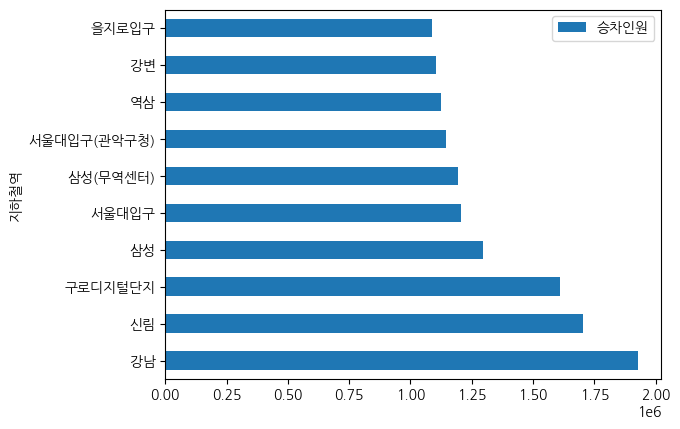

In [74]:
rush.pivot_table(index = '지하철역', values = '승차인원', aggfunc = 'mean', fill_value = 0 ).sort_values(by = '승차인원', ascending = False)[:10].plot.barh()
plt.show()

,총승차인원
사용월,
201501,383720
201502,324216
201503,410772
201504,402559
201505,384334
...,...
202104,416996
202105,401016
202106,418484
